In [1]:
from mb_rag.basic import ModelFactory

In [ ]:
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')
# llm.invoke_query('What is the capital of France?')

[{'type': 'text',
  'text': 'The capital of France is **Paris**.',
  'extras': {'signature': 'ErgDCrUDAdHtim9G/+S4Ey59+2XMlONpUkb0s4c5CjEW0w4CZ5WM4iIXTr1g5MWmjBRhsRQMNaHmjoIlrNYdiXwfcCoaeOiyYepjst0m7afu6X6NARIGv0rRL6DzzQlWIQ3daqKNuCYEkr0tynqYJ/F2sxN3FC0a8NbPtz0rCVjPIjzeLA8KyBLkTcgK/kfC16yPt41ETEmGsq9v8azhAk+jho0DViBe0a+i+wIF6KddhUsFS5yYcC1ZJyyLVT9JSqXVL4a6a83W+MlxNwaVYVVEdsnnZ+KgwXyqHZjIMEVuxArecmp6aHje+NtzTckmQEfqwcA+R7SFWryJVkLIrO9VHD8YJPskn4AB6oXvgnd7+T1PUcQCukN5d5r+n+3Vg2q3UtDAba/Ax4zPgeG0i+De0Io8P2ZTjLgm/ILln2ztZouqFNlY9MulpRY/ztUrtaO4vd21nV4Uo2GuwWAfk8JmyprW7h0fCjBGXZEItaK+S1oVyIuiMW+dI9phiaII+s352+no/l6t/nnqTwy+nSRxETPLQKpdqMZprbEzg9RijPB6A6zxIzxWxVFqp0LzPnRUVSPhW4W6Mjc='}}]

In [3]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [4]:
from mb_rag.agents.bb_autolabel import create_labeling_agent,LabelingGraph

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
agent = create_labeling_agent(llm.model,logging=False)

In [6]:
graph_agent = LabelingGraph(agent)

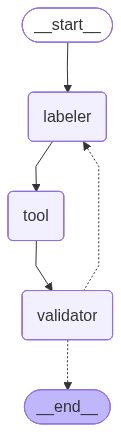

In [7]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "scrambled eggs",\n      "box": [\n        0.191,\n        0.348,\n        0.765,\n        0.645\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.730,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'Es0lCsolAdHtim92a3Vn0Ex7uylu1olO1YoNKHXklWzYDjYLnXZFsdECXGVk4NqDTL8zbELoK+CoyRcbcrXPhYZaUA3arJzLKkpRldiYXRUkwJl73dnV7vArsuueXo34sgZk+4oteJ5y64yDsiPN40swg4PqT3Yw8CSfpdP1VwwqoAl9fD8Mn2Xq5JlFeOnpR1PuuP7lQbEWK6tQOQCOOvjfR1ciigC4vsqz66ePtswlxqjeOlwftOdBjqsGdCk72Dk1vrDfgw5uFcJy28rG+1Fz4Dn773WE4Lxa58IPXPuOeIyvP+F317u0rnbFgdM9UF+L6l7z9abv8H4HWEllmnrPXNpTbETzT+x4sBVxqYP4HPRt5K/vLIWY24JUGjEHg/L5n0FhoeMC5/BekN524FlGvUsBlwEZfL0DlZCQ6Elj0kN2HLE6rvUzCm0XTwKdIE8Mve5m+C2ehormjgtBdjaskEyJ8PVdQ8x2W3mtzPyx+hd5UadA3yoGAAbZHgylCRIt9t3tXfR2kBNrIEL+PrOFBmwVKqC0O0uVrWuXNNcUDguoP

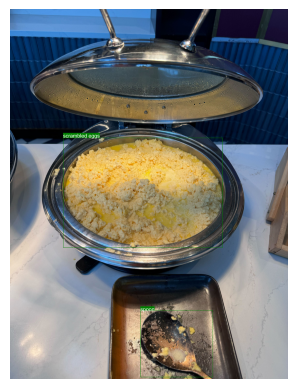

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "valid": true,\n  "failed_labels": []\n}\n```', 'extras': {'signature': 'EoIKCv8JAdHtim/rfq1sj7b4IvTH8Zl+tjtavFP41pCEFH9KXKNmZGa3071mYcWAL3v509VMgJEe/OGL9tMVw5AaLyq8JUR8WGXT3T1axg4at8IsZnsr5XfmJnSR4DLvQZM8RTBioLVNoAslC9jV8vIjgmAWKhxnvbGmi80XyEvEW8CjUxMBUabj2ZSn0D2GAM+bGaS+LeePhZBBKxxiip/hoohmc/LESxRrdFSgKlR64tmwMP19m6jiBsKDPRQ+CRpKtdkZ+31VWdpV14GhewKK3LBBOLstDTnaZC+V7Ur6BSQnRz5gDB3yD0/2ZTrHXOwTyokHipYQIhZxCV6RJzuFSlL3QYlFx4jofAmuuwJ7P6RaejxyZAYyljcnSl4ybtJgr5vJQPsGc3YFJrRaq51q3cqM4mjCASGgq/kBshxJ60TecazulHUSOAkQ434No4k+5xr4e7Av3onviA4KDppkVJe/2K5LRmsuqsQhO16ASK1VWljbadALXdCjiEbX9Z9BM5j62gRlCM47EydprrwzLQ49g4eo3rg8J/cq0SMBKbxPwJMMO0+9ZhHgM42FI1EG7AI+3Z3kPHJAX4JwEJ9SE+iv3kiYCFhmAnIrbZthdMVQFW3YJ4X85eDS8Y9zus2lCKXLq1ok1eRQglFiS0ud+V5HrUAWR3ozGwo6/GDN8eo8i7kQrq84PzrDXZ8Mc+UNCsJyaapdtwDWXkzWakOZa3YFGLKstbCrdqHDPLNu63Ovrwlw6pWXVehIV+OLgt5shAGqb6uacVhTSPGa7NZfgeRA7hHq4bjeo8f2UC8/OUU+9cXIK4rTmUjohodDmJ6+WHGF1pHtqoOvDtN8VPEL5Rf

{'messages': [{'role': 'agent',
   'content': '{\n  "labeled_objects": [\n    {\n      "label": "scrambled eggs",\n      "box": [\n        0.191,\n        0.348,\n        0.765,\n        0.645\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.730,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}'}],
 'boxes_json': '{\n  "labeled_objects": [\n    {\n      "label": "scrambled eggs",\n      "box": [\n        0.191,\n        0.348,\n        0.765,\n        0.645\n      ],\n      "valid": false\n    },\n    {\n      "label": "spoon",\n      "box": [\n        0.469,\n        0.814,\n        0.730,\n        0.995\n      ],\n      "valid": false\n    }\n  ]\n}',
 'labeled_objects': [{'label': 'scrambled eggs',
   'box': [0.191, 0.348, 0.765, 0.645],
   'valid': False},
  {'label': 'spoon', 'box': [0.469, 0.814, 0.73, 0.995], 'valid': False}],
 'temp_bb_img_path': './data/temp_bb_image.jpg',
 'valid': 

In [8]:
graph_agent.run(image_path='./data/IMG_1827.jpg', query="Label the spoon and scambled eggs in the image.")

In [9]:
# from mb_rag.basic import ModelFactory
# import os
# from dotenv import load_dotenv
# load_dotenv()

In [10]:
# llm = ModelFactory(model_name='gemini-3-pro-preview',model_type='google')

In [11]:
# k =llm.invoke_query('how to use thinking level in gemini 3 with langchain?')

In [12]:
# k[0]['text']